In [58]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [59]:
env = BlackjackEnv()

In [60]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final value function
    V = defaultdict(float)
    
    # Implement this!
    
    for episode in range(num_episodes):
        observation = env.reset()
        episodes = []
        for t in range(100):
            action = policy(observation)
            next_observation, reward, done, _ = env.step(action)
            episodes.append([observation, action, reward])
            if done:
                break
            observation = next_observation
        
        state_g = {}
        for i in range(len(episodes)):
            state = episodes[i][0]
            g = sum(episodes[j][2]*discount_factor**(j-i-1) for j in range(i,len(episodes)))
            
            if state not in state_g:
                state_g[state] = g
            else:
                g = state_g[state]  
                
            returns_count[state]+=1.0
            returns_sum[state]+=g
            V[state] = returns_sum[state]/returns_count[state]

    return V    

In [61]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

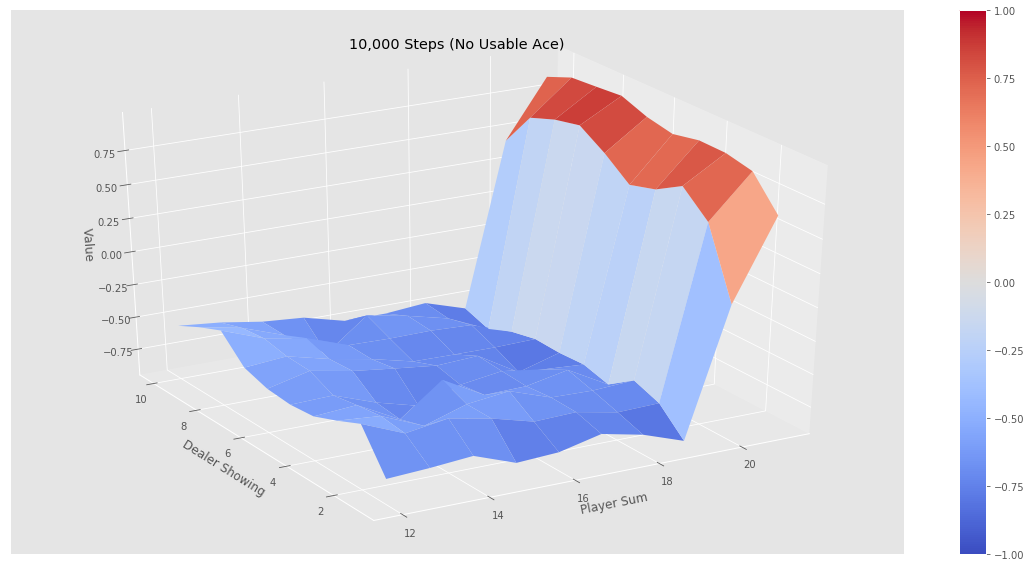

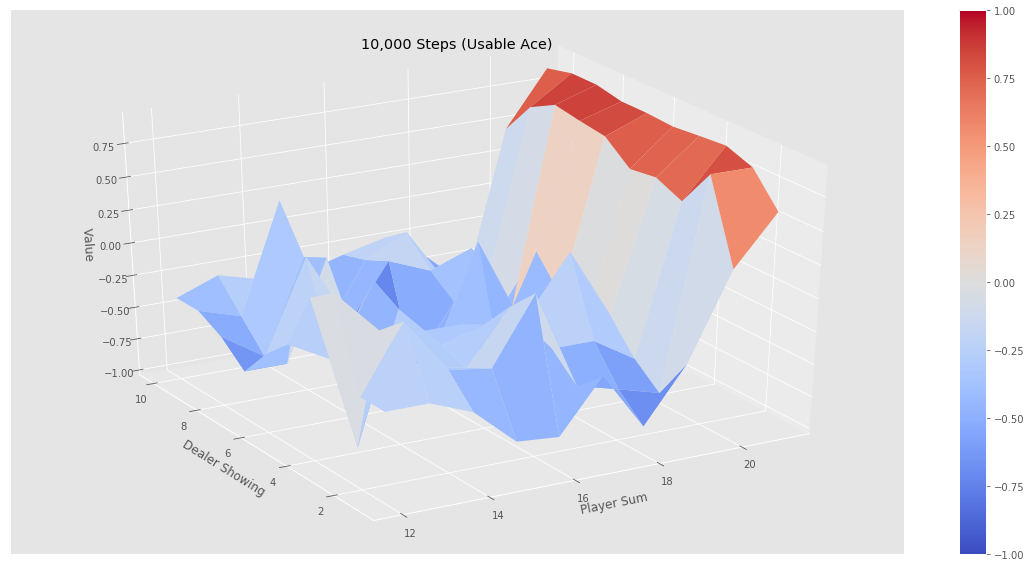

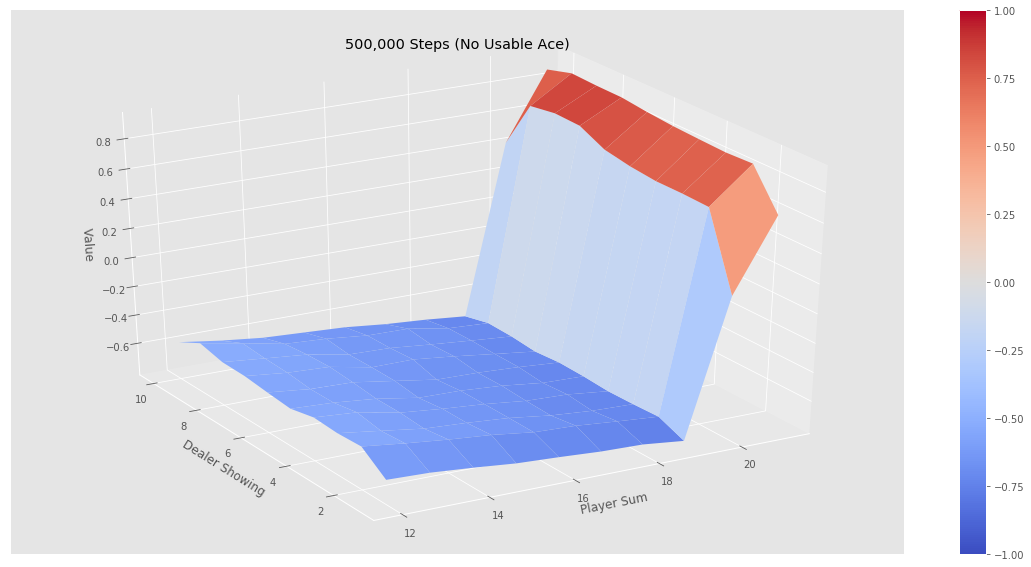

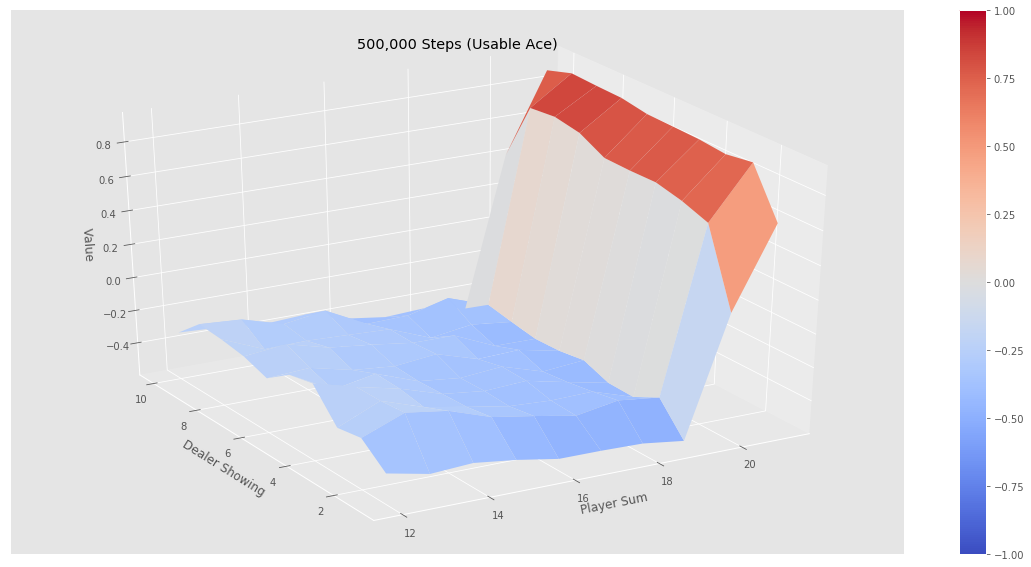

In [62]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")